In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,accuracy_score,roc_auc_score,confusion_matrix,recall_score, roc_auc_score, precision_score,precision_recall_curve,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from numpy import mean, sqrt, argmax
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_excel('C:/Users/anush/Desktop/Hospital Dataset/Hospital Dataset/Hospital Dataset/TrainDataSet.xlsx')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#Check for missing values in each column
for col in df:
    print(df[col],"\n","No of missing values:", len(df.loc[(df[col] == '?')]))

0          2278392
1           149190
2            64410
3           500364
4            16680
           ...    
69994    200032164
69995    200044230
69996    200066760
69997    200069448
69998    200078412
Name: encounter_id, Length: 69999, dtype: int64 
 No of missing values: 0
0          8222157
1         55629189
2         86047875
3         82442376
4         42519267
           ...    
69994     70288659
69995     60203502
69996     97019901
69997     57638331
69998    102604734
Name: patient_nbr, Length: 69999, dtype: int64 
 No of missing values: 0
0              Caucasian
1              Caucasian
2        AfricanAmerican
3              Caucasian
4              Caucasian
              ...       
69994          Caucasian
69995          Caucasian
69996          Caucasian
69997          Caucasian
69998          Caucasian
Name: race, Length: 69999, dtype: object 
 No of missing values: 1356
0        Female
1        Female
2        Female
3          Male
4          Male
          

In [4]:
#Replace ? with NaN for ease of processing
df= df.replace({'?':np.NaN})
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
column_list= list(df.columns)
column_list

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [6]:
#Fill the missing values in column: race with its mode
for column in column_list:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [8]:
#Fill the missing values in column: gender with its mode
df['gender']= df['gender'].replace({'Unknown/Invalid':df['gender'].mode().iloc[0]})
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
#Replace range values with their mean
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [11]:
df['age']=df['age'].replace('\[','',regex=True)
df['age']=df['age'].replace('\)','',regex=True)
df['age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [12]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean
df['age'] = df['age'].apply(lambda x: split_mean(x))
df['age']

0         5.0
1        15.0
2        25.0
3        35.0
4        45.0
         ... 
69994    55.0
69995    45.0
69996    65.0
69997    95.0
69998    75.0
Name: age, Length: 69999, dtype: float64

In [13]:
df['weight']=df['weight'].replace('\[','',regex=True)
df['weight']=df['weight'].replace('\)','',regex=True)
df['weight']=df['weight'].replace('>200','200-300',regex=True)
df['weight'].unique()

array(['75-100', '50-75', '0-25', '100-125', '25-50', '125-150',
       '175-200', '150-175', '200-300'], dtype=object)

In [14]:
df['weight'] = df['weight'].apply(lambda x: split_mean(x))

In [15]:
df['weight'].unique()

array([ 87.5,  62.5,  12.5, 112.5,  37.5, 137.5, 187.5, 162.5, 250. ])

In [16]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,87.5,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,87.5,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,25.0,87.5,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,87.5,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,87.5,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
#Apply Label Encoder across variables with categorical data
column_list_le= ['race', 'gender', 'payer_code','medical_specialty','metformin','repaglinide','nateglinide','chlorpropamide',
'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted',
'max_glu_serum','A1Cresult']
column_list_le

['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'max_glu_serum',
 'A1Cresult']

In [18]:
le = LabelEncoder()
df[column_list_le] = df[column_list_le].apply(LabelEncoder().fit_transform)

In [19]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,5.0,87.5,6,25,1,1,...,0,1,1,0,0,0,0,1,0,0
1,149190,55629189,2,0,15.0,87.5,1,1,7,3,...,0,3,1,0,0,0,0,0,1,0
2,64410,86047875,0,0,25.0,87.5,1,1,7,2,...,0,1,1,0,0,0,0,1,1,0
3,500364,82442376,2,1,35.0,87.5,1,1,7,2,...,0,3,1,0,0,0,0,0,1,0
4,16680,42519267,2,1,45.0,87.5,1,1,7,1,...,0,2,1,0,0,0,0,0,1,0
5,35754,82637451,2,1,55.0,87.5,2,1,2,3,...,0,2,1,0,0,0,0,1,1,0
6,55842,84259809,2,1,65.0,87.5,3,1,2,4,...,0,2,1,0,0,0,0,0,1,0
7,63768,114882984,2,1,75.0,87.5,1,1,7,5,...,0,1,1,0,0,0,0,1,1,0
8,12522,48330783,2,0,85.0,87.5,2,1,4,13,...,0,2,1,0,0,0,0,0,1,0
9,15738,63555939,2,0,95.0,87.5,3,3,4,12,...,0,2,1,0,0,0,0,0,1,0


In [20]:
#Convert alphanumeric data to numeric
df['diag_1'] =  df['diag_1'].apply(lambda x: re.sub('[^0-9]+','', str(x)))
df['diag_1'].unique()

array(['25083', '276', '648', '8', '197', '414', '428', '398', '434',
       '2507', '157', '518', '999', '410', '682', '402', '737', '572',
       '57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '2506', '618', '182', '845', '423', '808', '2504', '722', '403',
       '25011', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '25032', '433', '58', '569',
       '185', '536', '255', '25013', '599', '558', '574', '491', '560',
       '244', '25003', '577', '730', '188', '824', '2508', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '25002', '493',
       '642', '625', '571', '738', '593', '25042', '807', '456', '446',
       '575', '25041', '820', '515', '780', '25022', '995', '235',
       '25082', '721', '787', '162', '724', '282', '514', '55', '281',
       '25033', '530', '466', '435', '25012', '53', '789', '566', '822',
       

In [21]:
df['diag_2'] =  df['diag_2'].apply(lambda x: re.sub('[^0-9]+','', str(x)))
df['diag_2'].unique()

array(['428', '25001', '250', '25043', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '456', '401', '715',
       '496', '585', '25002', '410', '999', '996', '135', '244', '41',
       '571', '276', '997', '599', '424', '491', '553', '707', '286',
       '440', '493', '242', '70', '45', '25003', '357', '511', '196',
       '396', '197', '414', '25052', '577', '535', '413', '285', '53',
       '780', '518', '150', '566', '2506', '867', '486', '15', '8', '788',
       '340', '574', '581', '228', '530', '25082', '786', '294', '567',
       '785', '512', '305', '729', '25051', '280', '648', '560', '618',
       '444', '38', '10', '578', '277', '781', '25042', '278', '426',
       '584', '462', '402', '153', '272', '733', '34', '881', '203',
       '25041', '25013', '293', '245', '25012', '558', '787', '342',
       '573', '626', '303', '25053', '458', '710', '415', '42', '284',
       '569', '759', '682', '112', '292', '435', '290', '25093', '642',
    

In [22]:
df['diag_3'] =  df['diag_3'].apply(lambda x: re.sub('[^0-9]+','', str(x)))
df['diag_3'].unique()

array(['250', '255', '27', '403', '45', '38', '486', '996', '197', '2506',
       '427', '627', '414', '416', '714', '428', '582', '43', '25001',
       '263', '25042', '276', '482', '401', '25041', '585', '781', '278',
       '998', '568', '682', '618', '25002', '305', '707', '496', '599',
       '715', '424', '518', '553', '794', '411', '42', '531', '511',
       '490', '562', '2508', '2507', '25052', '784', '491', '581', '420',
       '8', '724', '730', '789', '131', '25082', '999', '41', '493',
       '25003', '753', '786', '529', '888', '425', '595', '303', '560',
       '711', '492', '332', '296', '438', '362', '2504', '654', '244',
       '70', '737', '625', '681', '25051', '404', '10', '810', '280',
       '440', '785', '588', '569', '272', '997', '25043', '918', '584',
       '54', '788', '426', '722', '25092', '196', '461', '535', '787',
       '891', '284', '458', '648', '780', '182', '285', '593', '413',
       '664', '564', '201', '356', '15', '292', '782', '473', '455',
 

In [23]:
df['max_glu_serum'].unique()

array([2, 1, 3, 0])

In [24]:
df['max_glu_serum']= df['max_glu_serum'].replace({'>200':'250','>300':'350'})
df['max_glu_serum'].unique()

array([2, 1, 3, 0])

In [25]:
df['A1Cresult'].unique()

array([2, 0, 1, 3])

In [26]:
df['A1Cresult']= df['A1Cresult'].replace({'>7':'7.5','>8':'8.5'})
df['A1Cresult'].unique()

array([2, 0, 1, 3])

In [27]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,5.0,87.5,6,25,1,1,...,0,1,1,0,0,0,0,1,0,0
1,149190,55629189,2,0,15.0,87.5,1,1,7,3,...,0,3,1,0,0,0,0,0,1,0
2,64410,86047875,0,0,25.0,87.5,1,1,7,2,...,0,1,1,0,0,0,0,1,1,0
3,500364,82442376,2,1,35.0,87.5,1,1,7,2,...,0,3,1,0,0,0,0,0,1,0
4,16680,42519267,2,1,45.0,87.5,1,1,7,1,...,0,2,1,0,0,0,0,0,1,0
5,35754,82637451,2,1,55.0,87.5,2,1,2,3,...,0,2,1,0,0,0,0,1,1,0
6,55842,84259809,2,1,65.0,87.5,3,1,2,4,...,0,2,1,0,0,0,0,0,1,0
7,63768,114882984,2,1,75.0,87.5,1,1,7,5,...,0,1,1,0,0,0,0,1,1,0
8,12522,48330783,2,0,85.0,87.5,2,1,4,13,...,0,2,1,0,0,0,0,0,1,0
9,15738,63555939,2,0,95.0,87.5,3,3,4,12,...,0,2,1,0,0,0,0,0,1,0


In [28]:
X= df.drop('readmitted',axis=1).copy() #Alternative: X= df_no_missing.iloc[:,:-1]
y= df['readmitted'].copy()
X,y

(       encounter_id  patient_nbr  race  gender   age  weight  \
 0           2278392      8222157     2       0   5.0    87.5   
 1            149190     55629189     2       0  15.0    87.5   
 2             64410     86047875     0       0  25.0    87.5   
 3            500364     82442376     2       1  35.0    87.5   
 4             16680     42519267     2       1  45.0    87.5   
 ...             ...          ...   ...     ...   ...     ...   
 69994     200032164     70288659     2       1  55.0    87.5   
 69995     200044230     60203502     2       1  45.0    87.5   
 69996     200066760     97019901     2       1  65.0    87.5   
 69997     200069448     57638331     2       1  95.0    87.5   
 69998     200078412    102604734     2       1  75.0    87.5   
 
        admission_type_id  discharge_disposition_id  admission_source_id  \
 0                      6                        25                    1   
 1                      1                         1               

In [29]:
#Convert datatype object to int
X.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int32
gender                        int32
age                         float64
weight                      float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                    int32
medical_specialty             int32
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int32
A1Cresult                     int32
metformin                     int32
repaglinide                   int32
nateglinide                   int32
chlorpropamide              

In [30]:
#Convert data type 'object' to 'int'
X["diag_1"] = X["diag_1"].astype(str).astype(int)
X["diag_2"] = X["diag_2"].astype(str).astype(int)
X["diag_3"] = X["diag_3"].astype(str).astype(int)

In [31]:
X.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int32
gender                        int32
age                         float64
weight                      float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                    int32
medical_specialty             int32
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                        int32
diag_2                        int32
diag_3                        int32
number_diagnoses              int64
max_glu_serum                 int32
A1Cresult                     int32
metformin                     int32
repaglinide                   int32
nateglinide                   int32
chlorpropamide              

In [32]:
#Normalize the data
scaler= MinMaxScaler()
X_norm= pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)
X_norm= X_norm.round(3)
print(X_norm)

       encounter_id  patient_nbr  race  gender    age  weight  \
0             0.011        0.071   0.5     0.0  0.000   0.316   
1             0.001        0.483   0.5     0.0  0.111   0.316   
2             0.000        0.747   0.0     0.0  0.222   0.316   
3             0.002        0.716   0.5     1.0  0.333   0.316   
4             0.000        0.369   0.5     1.0  0.444   0.316   
...             ...          ...   ...     ...    ...     ...   
69994         1.000        0.610   0.5     1.0  0.556   0.316   
69995         1.000        0.523   0.5     1.0  0.444   0.316   
69996         1.000        0.842   0.5     1.0  0.667   0.316   
69997         1.000        0.500   0.5     1.0  1.000   0.316   
69998         1.000        0.891   0.5     1.0  0.778   0.316   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                  0.714                     0.889                0.000   
1                  0.000                     0.000                0.2

In [33]:
#VIF is used to remove the interaction effect between the independent variables
def calc_vif(X_norm):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_norm.columns
    vif["VIF"] = [variance_inflation_factor(X_norm.values, i) for i in range(X_norm.shape[1])]
       
    return(vif)
VIF= calc_vif(X_norm)
VIF

C:\Users\anush\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,encounter_id,7.800506
1,patient_nbr,3.627878
2,race,4.560988
3,gender,1.888791
4,age,18.906068
5,weight,238.649114
6,admission_type_id,1.882402
7,discharge_disposition_id,1.407095
8,admission_source_id,2.608041
9,time_in_hospital,3.274709


In [34]:
#Drop variables with VIF score greater than 5
X_new= X_norm.drop(['encounter_id','age','weight','num_lab_procedures','num_medications','number_diagnoses','max_glu_serum',
'A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','glipizide','glyburide','pioglitazone',
'rosiglitazone','acarbose','miglitol','glyburide-metformin','diabetesMed','payer_code'],axis=1)
X_new.head()

,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,number_outpatient,...,troglitazone,tolazamide,examide,citoglipton,insulin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,0.071,0.5,0.0,0.714,0.889,0.000,0.000,0.507,0.000,0.000,...,0.0,0.0,0.0,0.0,0.333,0.0,0.0,0.0,0.0,1.0
1,0.483,0.5,0.0,0.000,0.000,0.286,0.154,0.239,0.000,0.000,...,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0
2,0.747,0.0,0.0,0.000,0.000,0.286,0.077,0.239,0.833,0.048,...,0.0,0.0,0.0,0.0,0.333,0.0,0.0,0.0,0.0,1.0
3,0.716,0.5,1.0,0.000,0.000,0.286,0.077,0.239,0.167,0.000,...,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0
4,0.369,0.5,1.0,0.000,0.000,0.286,0.000,0.239,0.000,0.000,...,0.0,0.0,0.0,0.0,0.667,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test= train_test_split(X_new,y, random_state=45)

In [36]:
#Remove recursive features
#RFE is used to select features which are better at prediciting the outcome variable
Init_Model= LogisticRegression(max_iter=10000,solver='lbfgs')
rfe = RFE(Init_Model)
rfe_model = rfe.fit(X_train,y_train)
print(rfe_model.support_)

[ True False False  True  True False  True False  True False  True  True
 False  True  True False  True False  True False False False  True False
 False False  True]


In [37]:
#Extract the valid feature names
filter = rfe.get_support()
features = np.array(X_new.columns)
X_new_features= features[filter]
X_new= X_norm.filter(X_new_features, axis=1)
X_new.head()

,patient_nbr,admission_type_id,discharge_disposition_id,time_in_hospital,num_procedures,number_emergency,number_inpatient,diag_2,diag_3,tolbutamide,tolazamide,glipizide-metformin,change
0,0.071,0.714,0.889,0.000,0.000,0.0,0.000,0.017,0.007,0.0,0.0,0.0,1.0
1,0.483,0.000,0.000,0.154,0.000,0.0,0.000,0.996,0.007,0.0,0.0,0.0,0.0
2,0.747,0.000,0.000,0.077,0.833,0.0,0.048,0.010,0.001,0.0,0.0,0.0,1.0
3,0.716,0.000,0.000,0.077,0.167,0.0,0.000,0.998,0.011,0.0,0.0,0.0,0.0
4,0.369,0.000,0.000,0.000,0.000,0.0,0.000,0.006,0.007,0.0,0.0,0.0,0.0


In [38]:
X_new.shape

(69999, 13)

In [39]:
pred_values = rfe_model.predict(X_test)

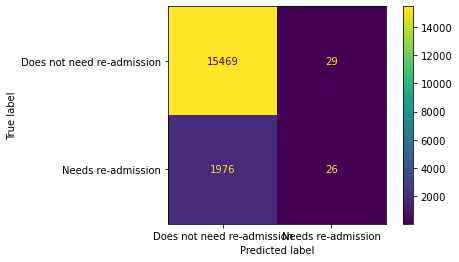

In [40]:
#True negatives are much greater than true positives, hence the model is skewed
#For a hospital re-admission, since the number of false negatives is more important than the no. of false positives,
#we have to adjust the model so the no. of false negatives can be increased.
plot_confusion_matrix(rfe_model,X_test,y_test,display_labels=["Does not need re-admission", "Needs re-admission"])

In [41]:
accuracy_model = accuracy_score(y_test, pred_values)
accuracy_model

0.8854285714285715

In [42]:
aucrocscore= roc_auc_score(y_test, pred_values)
aucrocscore

0.5055579018993653

In [43]:
f1 = f1_score(y_test, pred_values)
f1

0.025279533300923678

In [44]:
#Use the data with only relevant features as extracted from the RFE model
X_train1, X_test1, y_train1, y_test1= train_test_split(X_new,y, random_state=95)

In [45]:
Upd_Model= LogisticRegression(max_iter=10000,solver='lbfgs',penalty='l2')
Upd_Model= Upd_Model.fit(X_train1, y_train1)

In [46]:
#Grid Search for finding the best 'C' value
c_values = np.linspace(0,50,200)
grid = dict(C=c_values)
grid_search = GridSearchCV(estimator=Upd_Model, param_grid=grid, n_jobs=-1, scoring='accuracy')
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\anush\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88681689 0.8867788  0.8867788  0.88675975 0.88679784
 0.8867788  0.8867407  0.8867026  0.88672165 0.88672165 0.8867026
 0.88668356 0.8867026  0.88668356 0.88668356 0.88666451 0.88668356
 0.88668356 0.88668356 0.88666451 0.88664546 0.88664546 0.88664546
 0.88664546 0.88664546 0.88664546 0.88664546 0.88664546 0.88664546
 0.88664546 0.88664546 0.88664546 0.88664546 0.88664546 0.88664546
 0.88662642 0.88662642 0.88662642 0.88662642 0.88662642 0.88662642
 0.88662642 0.88660737 0.88662642 0.88660737 0.88662641 0.88662641
 0.88662641 0.88660737 0.88662641 0.88662641 0.88662641 0.88664546
 0.88660737 0.88664546 0.88662641 0.88664546 0.88662641 0.88662641
 0.88662641 0.88662641 0.88662641 0.88662641 0.88662641 0.88662641
 0.88662641 0.88662641 0.88662641 0.88662641 0.88662641 0.88662641
 0.88662641 0.88662641 0.88662641 0.88662641 0.8866264

Best: 0.886817 using {'C': 0.25125628140703515}
nan (nan) with: {'C': 0.0}
0.886817 (0.000175) with: {'C': 0.25125628140703515}
0.886779 (0.000185) with: {'C': 0.5025125628140703}
0.886779 (0.000243) with: {'C': 0.7537688442211055}
0.886760 (0.000289) with: {'C': 1.0050251256281406}
0.886798 (0.000328) with: {'C': 1.2562814070351758}
0.886779 (0.000343) with: {'C': 1.507537688442211}
0.886741 (0.000337) with: {'C': 1.758793969849246}
0.886703 (0.000327) with: {'C': 2.0100502512562812}
0.886722 (0.000310) with: {'C': 2.2613065326633164}
0.886722 (0.000310) with: {'C': 2.5125628140703515}
0.886703 (0.000327) with: {'C': 2.7638190954773867}
0.886684 (0.000303) with: {'C': 3.015075376884422}
0.886703 (0.000327) with: {'C': 3.266331658291457}
0.886684 (0.000303) with: {'C': 3.517587939698492}
0.886684 (0.000303) with: {'C': 3.7688442211055273}
0.886665 (0.000288) with: {'C': 4.0201005025125625}
0.886684 (0.000296) with: {'C': 4.271356783919598}
0.886684 (0.000296) with: {'C': 4.522613065326

In [47]:
#Since the no. of TN's is way more than no. of TP's, it's an imbalanced classification. 
#Let's use weighted logistic regression to solve this problem.
w0= np.linspace(0.0,0.99,500)
param_grid = {'class_weight': [{0: x, 1:1-x} for x in w0]}

In [48]:
grid = GridSearchCV(estimator=Upd_Model, param_grid=param_grid, n_jobs=-1, scoring='f1')
grid_result = grid.fit(X_train1, y_train1)

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.255149 using {'class_weight': {0: 0.12102204408817635, 1: 0.8789779559118236}}
0.203197 (0.000073) with: {'class_weight': {0: 0.0, 1: 1.0}}
0.203197 (0.000073) with: {'class_weight': {0: 0.0019839679358717435, 1: 0.9980160320641283}}
0.203197 (0.000073) with: {'class_weight': {0: 0.003967935871743487, 1: 0.9960320641282565}}
0.203197 (0.000073) with: {'class_weight': {0: 0.0059519038076152305, 1: 0.9940480961923848}}
0.203197 (0.000073) with: {'class_weight': {0: 0.007935871743486974, 1: 0.992064128256513}}
0.203197 (0.000073) with: {'class_weight': {0: 0.009919839679358718, 1: 0.9900801603206413}}
0.203197 (0.000073) with: {'class_weight': {0: 0.011903807615230461, 1: 0.9880961923847695}}
0.203197 (0.000073) with: {'class_weight': {0: 0.013887775551102204, 1: 0.9861122244488978}}
0.203197 (0.000073) with: {'class_weight': {0: 0.015871743486973948, 1: 0.984128256513026}}
0.203197 (0.000073) with: {'class_weight': {0: 0.017855711422845692, 1: 0.9821442885771543}}
0.203197 (0.000

In [50]:
weight= {0: 0.12102204408817635, 1: 0.8789779559118236}
Upd_Model_2= LogisticRegression(max_iter=10000,solver='lbfgs',class_weight= weight,penalty='l2',C=0.25125628140703515)
Upd_Model_2= Upd_Model_2.fit(X_train1, y_train1)
pred_values2= Upd_Model_2.predict(X_test1)

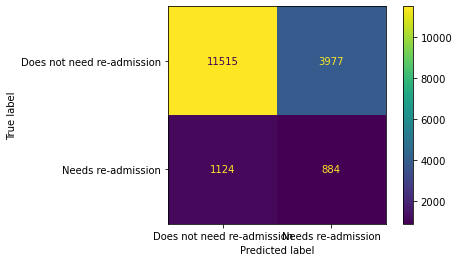

In [51]:
plot_confusion_matrix(Upd_Model_2,X_test1,y_test1,display_labels=["Does not need re-admission", "Needs re-admission"])

In [52]:
accuracy_model2 = accuracy_score(y_test1,pred_values2)
accuracy_model2

0.7085142857142858

In [53]:
aucrocscore1= roc_auc_score(y_test1,pred_values2)
aucrocscore1

0.5917629507788623

In [54]:
f1_new = f1_score(y_test1, pred_values2)
f1_new

0.25738826612316207

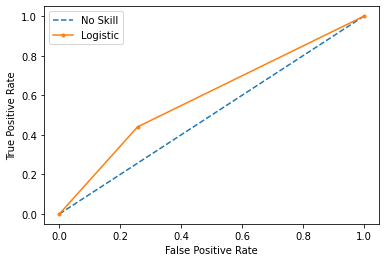

In [55]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test1, pred_values2)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.495833, F-Score=0.260


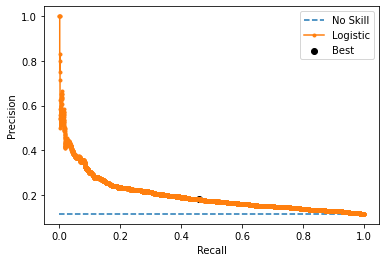

In [66]:
yhat = Upd_Model_2.predict_proba(X_test1)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# # calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test1, yhat)
precision= precision.round(3)
recall= recall.round(3)
# convert to f score
fscore = (2 * precision * recall)/(precision + recall)
fscore = fscore[~np.isnan(fscore)]
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [67]:
THRESHOLD = thresholds[ix]
decisions = (Upd_Model_2.predict_proba(X_test1)[:,1] >= THRESHOLD).astype(int)

In [68]:
pd.DataFrame(data=[accuracy_score(y_test1, decisions), recall_score(y_test1, decisions),
                   precision_score(y_test1, decisions), roc_auc_score(y_test1, decisions), f1_score(y_test1, decisions)], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1 score"])

,0
accuracy,0.698971
recall,0.458665
precision,0.180517
roc_auc_score,0.594392
f1 score,0.259072


In [69]:
confusion_matrix(y_test1, decisions)

array([[11311,  4181],
       [ 1087,   921]], dtype=int64)

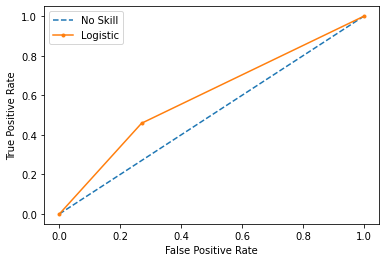

In [70]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test1, decisions)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()